# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Условия задачи:
1. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
2. При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
3. Бюджет на разработку скважин в регионе — 10 млрд рублей.
4. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
5. После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [2]:
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
display(data_1.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
display(data_2.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
data_3 = pd.read_csv('/datasets/geo_data_2.csv')
display(data_3.head())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


В первом пункте были подключены инструменты для работы над проектом, изучены три набора данных с локациями.

## Обучение и проверка модели

In [5]:
#разбиение на тренировочную, валидационную  выборки
#определение целевого и остальных признаков
def features_turget_fun(data):
    data_train, data_valid = train_test_split(data, test_size = 0.25, random_state = 12345)
    
    features_train = data_train.drop(['product', 'id'], axis = 1)
    target_train = data_train['product']
    features_valid = data_valid.drop(['product', 'id'], axis = 1)
    target_valid = data_valid['product']
    
    return features_train, target_train, features_valid, target_valid

features_train_1, target_train_1, features_valid_1, target_valid_1 = features_turget_fun(data_1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = features_turget_fun(data_2)
features_train_3, target_train_3, features_valid_3, target_valid_3 = features_turget_fun(data_3)

In [6]:
#обучение модели для первой локации
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
prediction_1 = model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1, prediction_1) ** 0.5
r2_score_1 = r2_score(target_valid_1, prediction_1)

print('Среднее целевого признака -', prediction_1.mean())
print('RMSE первой модели -', rmse_1)
print('R2 первой модели -', r2_score_1)

Среднее целевого признака - 92.59256778438038
RMSE первой модели - 37.5794217150813
R2 первой модели - 0.27994321524487786


In [7]:
#обучение модели для второй локации
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
prediction_2 = model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2, prediction_2) ** 0.5
r2_score_2 = r2_score(target_valid_2, prediction_2)

print('Среднее целевого признака -', prediction_2.mean())
print('RMSE второй модели -', rmse_2)
print('R2 второй модели -', r2_score_2)

Среднее целевого признака - 68.728546895446
RMSE второй модели - 0.893099286775616
R2 второй модели - 0.9996233978805127


In [8]:
#обучение модели для третей локации
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)
prediction_3 = model_3.predict(features_valid_3)
rmse_3 = mean_squared_error(target_valid_3, prediction_3) ** 0.5
r2_score_3 = r2_score(target_valid_3, prediction_3)

print('Среднее целевого признака -', prediction_3.mean())
print('RMSE третей модели -', rmse_3)
print('R2 третей модели -', r2_score_3)

Среднее целевого признака - 94.96504596800489
RMSE третей модели - 40.02970873393434
R2 третей модели - 0.20524758386040443


В данном пунке данные были разбиты на тренировочные и валидационные для каждой локации. После, были обучены три модели Линейной регрессии. Лучше всего показала себя модель обученная на втором наборе данных, согласно коэфициенту детерминации эта модель мочти идеально с отклонением предсказанного значения от значения источника меньше 1. Другие модели показали себя гораздо хуже с большим RMSE и малой метрикой R2. Но при этом у второй модели согласно значению медианы объемов запасов нефти в скважине этих запасов меньше чем в скважинах других локаций.

## Подготовка к расчёту прибыли

In [9]:
budget = 10000000000
price = 450000
wells_quantity = 200
volume = budget / (price * wells_quantity)
print('Минимальный объем сырья в скважине для безубыточной разработки - {:.2f}'.format(volume))
print('Средний запас сырья в первом регионе - {:.2f}'.format(data_1['product'].mean()))
print('Средний запас сырья во втором регионе - {:.2f}'.format(data_2['product'].mean()))
print('Средний запас сырья в третьем регионе - {:.2f}'.format(data_3['product'].mean()))

Минимальный объем сырья в скважине для безубыточной разработки - 111.11
Средний запас сырья в первом регионе - 92.50
Средний запас сырья во втором регионе - 68.83
Средний запас сырья в третьем регионе - 95.00


В ходе подготовки к расчету прибыли был получен минимальный запас сырья в скважине volume для безубыточного производства. После сравнения этого минимального объема со средним запасом сырья в скважинах по регионам было обнаружено, что volume заметно превышает средний запас на более чем 20 единиц объема. Но при этом стоит учитывать, что на разработку отправят только 200 скважин, а в самих таблицах регионов представлено 100000 скважин. 

## Расчёт прибыли и рисков 

Регион - 1
Средняя прибыль - 425938526.91
Квантиль 2.5% - -102090094.84
Квантиль 97.5% - 947976353.36
Вероятность убытка - 0.06


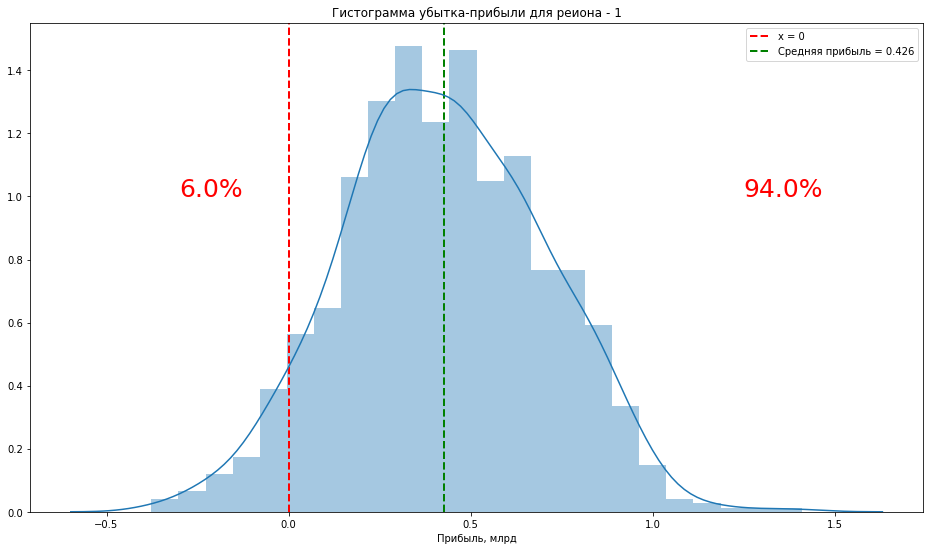

Регион - 2
Средняя прибыль - 518259493.7
Квантиль 2.5% - 128123231.43
Квантиль 97.5% - 953612982.07
Вероятность убытка - 0.003


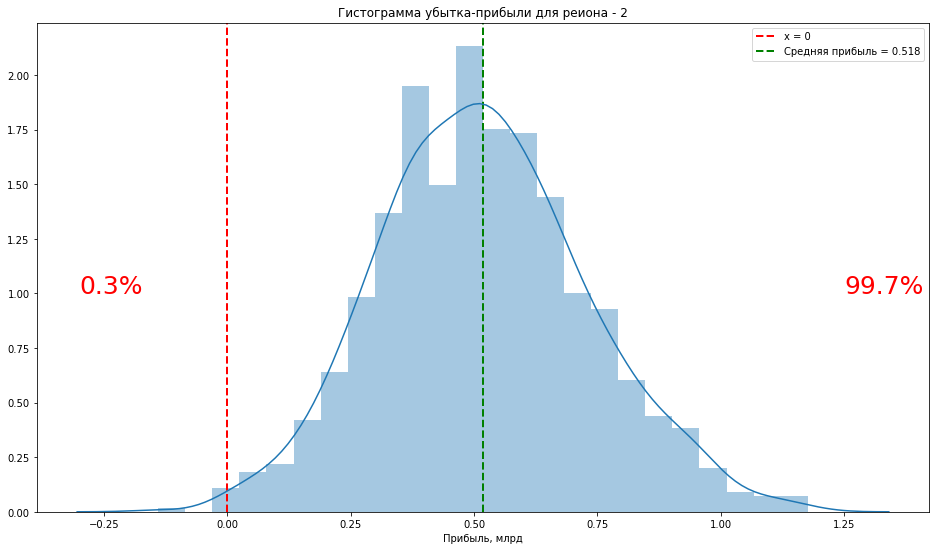

Регион - 3
Средняя прибыль - 420194005.34
Квантиль 2.5% - -115852609.16
Квантиль 97.5% - 989629939.84
Вероятность убытка - 0.062


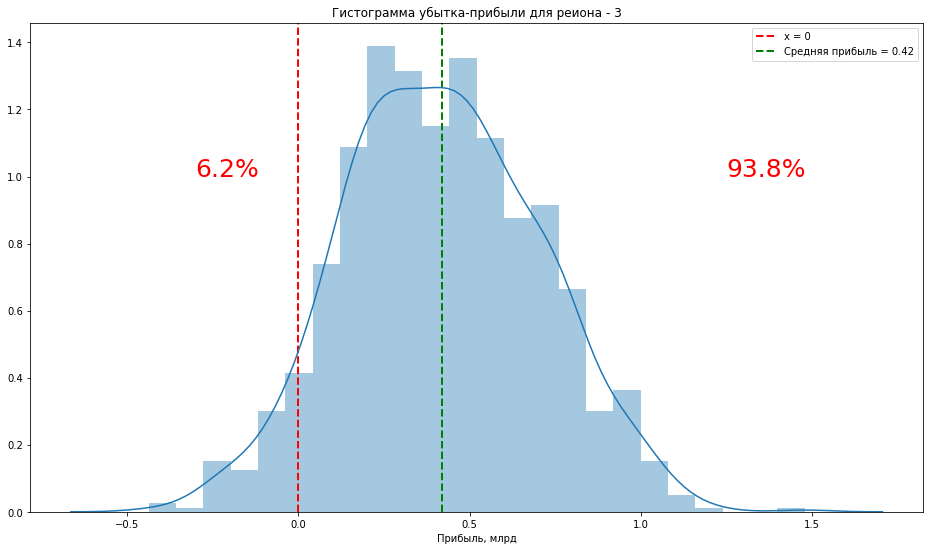

In [10]:
#функция расчета прибыли - убытка
def income_fun(predicted_valid, target_valid, count = 200):
    predicted_valid_sorted = predicted_valid.sort_values(ascending = False)
    selected = target_valid[predicted_valid_sorted.index][: count]
    return selected.sum() * price - budget

state = np.random.RandomState(12345)

#функция расчета риска
def risks_fun(target, prediction, region):
    income_values = []
    counter = 0
    for i in range(1000):
        target_subsample = target.sample(n = 500, replace = True, random_state = state)
        prediction_subsample = pd.Series(prediction, index = target.index)[target_subsample.index]
        income = income_fun(prediction_subsample, target_subsample, 200)
        if income < 0:
            counter = counter + 1
        income_values.append(income)
    income_values = pd.Series(income_values)
    
    #вывод рассчитаных значений
    print('Регион - ' + str(region))
    print('Средняя прибыль -', round(income_values.mean(), 2))
    print('Квантиль 2.5% -', round(income_values.quantile(0.025),2))
    print('Квантиль 97.5% -', round(income_values.quantile(0.975),2))
    print('Вероятность убытка -', counter/len(income_values))
    
    #вывод гистограмм
    plt.figure(figsize=(16,9))
    plt.text(-0.3,1, str(counter/1000 * 100) + '%', fontsize = 25, color = 'r')
    plt.text(1.25,1, str(100 - counter/len(income_values) * 100) + '%', fontsize = 25, color = 'r')
    plt.axvline(x=0, ymin=0, ymax=2, color = 'r', linestyle = '--', linewidth = 2, label = 'х = 0')
    plt.axvline(x=income_values.mean()/1000000000, ymin=0, ymax=2, color = 'g', linestyle = '--',
                linewidth = 2, label = 'Средняя прибыль = ' + str(round(income_values.mean()/1000000000, 3)))
    sns.distplot(income_values/1000000000)
    plt.title("Гистограмма убытка-прибыли для реиона - " + str(region))
    plt.xlabel("Прибыль, млрд")
    plt.legend()
    plt.show()
    
#вызов функции risks_fun для всех трех регионов
risks_fun(target_valid_1, prediction_1, 1)
risks_fun(target_valid_2, prediction_2, 2)
risks_fun(target_valid_3, prediction_3, 3)

На основе полученных гистограмм прибыли-убытка был выбран второй регион для разработки добычи нефти. Второй регион показал себя лучшим в метриках по вероятности убытка (p = 0.003), среденму значению прибыли (mean = 518259493.7). Кроме этого, лучше всего по метрикам RMSE и R2 показал себя  модель Линейной регрессии.

## Вывод

В ходе данного проекта был выбран регион, который лучше всего подходит для разработки месторождений нефти. 
1. данные были разбиты на тренировочные и валидационные для каждой локации. После, были обучены три модели Линейной регрессии. Лучше всего показала себя модель обученная на втором наборе данных, согласно коэфициенту детерминации эта модель мочти идеально с отклонением предсказанного значения от значения источника меньше 1. Другие модели показали себя гораздо хуже с большим RMSE и малой метрикой R2. Но при этом у второй модели согласно значению медианы объемов запасов нефти в скважине этих запасов меньше чем в скважинах других локаций.
2. В ходе подготовки к расчету прибыли был получен минимальный запас сырья в скважине volume для безубыточного производства. После сравнения этого минимального объема со средним запасом сырья в скважинах по регионам было обнаружено, что volume заметно превышает средний запас на более чем 20 единиц объема. Но при этом стоит учитывать, что на разработку отправят только 200 скважин, а в самих таблицах регионов представлено 100000 скважин.
3. На основе полученных гистограмм прибыли-убытка был выбран второй регион для разработки добычи нефти. Второй регион показал себя лучшим в метриках по вероятности убытка (p = 0.003), среденму значению прибыли (mean = 518259493.7). Кроме этого, лучше всего по метрикам RMSE и R2 показал себя модель Линейной регрессии.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован